In [1]:
# Dependencies
%matplotlib notebook
import pandas as pd
import json
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import numpy as np

In [2]:
#Readiing csv files
income_raw_data = pd.read_csv("../Resources/SAINC1 Personal Income Summary.csv")
expenditure_raw_data = pd.read_csv("../Resources/SAEXP1__ALL_AREAS_1997_2019.csv")
states_list = pd.read_csv("../Resources/states.csv")

income_raw_data.head()

,GeoFips,GeoName,LineCode,Description,1929,1930,1931,1932,1933,1934,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,United States,1.0,Personal income (millions of dollars),85151,76394,65531,50162,47114,53967,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,0,United States,2.0,Population (persons) 1/,121769000,123075000,124038000,124839000,125580000,126372000,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,0,United States,3.0,Per capita personal income (dollars) 2/,699,621,528,402,375,427,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,1000,Alabama,1.0,Personal income (millions of dollars),843.2,697.5,583.7,421.9,435.6,556.3,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,1000,Alabama,2.0,Population (persons) 1/,2644000,2647000,2649000,2653000,2661000,2685000,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [3]:
#Analyse income_raw 
#Create dataframe from 1997 to 2019
#Drop irrelevant columns, 

years_dropped = list(range(1929,1997))
income_1997_2019 = income_raw_data

for year in years_dropped:
    income_1997_2019 = income_1997_2019.drop(columns = str(year))

income_df = income_1997_2019.drop(columns = ["GeoFips"])
income_df.head()

,GeoName,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7086935.0,7601594.0,8001563.0,8650325.0,9001839.0,9155663.0,9480901.0,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,United States,3.0,Per capita personal income (dollars) 2/,25993.0,27557.0,28675.0,30657.0,31589.0,31832.0,32681.0,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,Alabama,1.0,Personal income (millions of dollars),93981.4,99953.3,103453.1,108355.1,112154.9,115191.8,120211.1,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0


In [4]:
#Create population dataframe
population = income_df.loc[income_df["Description"] == "Population (persons) 1/"]
population.set_index(["GeoName"], inplace = True)
population.head()

,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,,,,,,,,,,,,,,
United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,4530729.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Alaska,2.0,Population (persons) 1/,612968.0,619932.0,624779.0,627963.0,633714.0,642337.0,648414.0,659286.0,...,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
Arizona,2.0,Population (persons) 1/,4736990.0,4883342.0,5023823.0,5160586.0,5273477.0,5396255.0,5510364.0,5652404.0,...,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
Arkansas,2.0,Population (persons) 1/,2601090.0,2626289.0,2651860.0,2678588.0,2691571.0,2705927.0,2724816.0,2749686.0,...,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0


In [5]:
#Analyse expenditure_raw and drop irrelevant headings
expenditure_df = expenditure_raw_data.drop(columns = ["GeoFIPS", "Region", "TableName", "IndustryClassification"])

#set multi index on GeoName and Description
expenditure_df.set_index(["GeoName", "Description"], inplace = True)

#Drop rows with with all NaN values
expenditure_df.dropna(axis=0, how='all', inplace=True)

expenditure_df

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                       1997  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5534091.8   
               Goods                                              2003807.2   
                Durable goods                                      715529.6   
                 Motor vehicles and parts                          293082.5   
                 Furnishings and durable household equipment       160490.2   
...                                                                     ...   
Far West         Financial services and insurance                   83502.2   
                 Other services                                     73099.5   
                Final consumption expenditures of nonprofit i...    15583.2   
                 Gross output of nonprofit institutions             79226.1   
                 Less: Receipts from sales of goods and servi...    63642.9   

                                                                       1998  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5874285.0   
               Goods                                              2105476.2   
                Durable goods                                      779293.4   
                 Motor vehicles and parts                          320204.7   
                 Furnishings and durable household equipment       173579.1   
...                                                                     ...   
Far West         Financial services and insurance                   91262.2   
                 Other services                   

In [6]:
#Change expenditure dataframe to be in per capital values

In [7]:
#Creating empty description series in database for per capita dataframe
expenditure_new = expenditure_df[['LineCode', 'Unit']]

expenditure_new

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  
GeoName       Description                                                                      
United States Personal consumption expenditures                   Millions of current dollars  
               Goods                                              Millions of current dollars  
                Durable goods                                     Millions of current dollars  
                 Motor vehicles and parts                         Millions of current dollars  
                 Furnishings and durable household equipment      Millions of current dollars  
...                                                                                       ...  
Far West         Financial services and insurance                 Millions of current dollars  
                 Other services                                   Millions of current dollars  
                Final consumption expenditures of nonprofit i...  Millions of current dollars  
                 Gross output of nonprofit institutions           Millions of current dollars  
                 Less: Receipts from sales of goods and servi...  Millions of current dollars  

[1440 rows x 2 columns]

In [8]:
#Changing Description series to report correct units i.e. per Capita
#Changing Units in the description
#Calculating the per capita data

for year in list(range(1997,2020)):
    expenditure_new[str(year)]=None   #Creates empty columns of years range
    
    for indx in expenditure_df.index.values:
       
        expenditure_new[str(year)].loc[(indx)] = expenditure_df.loc[(indx)][str(year)] * 1000000 /\
        population.loc[indx[0]][str(year)]
        

        
expenditure_new

<ipython-input-8-3ad6c40ab6bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditure_new[str(year)]=None   #Creates empty columns of years range
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-8-3ad6c40ab6bb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                     1997  \
GeoName       Description                                                   
United States Personal consumption expenditures                   20297.6   
               Goods                                              7349.46   
                Durable goods                                     2624.38   
                 Motor vehicles and parts                         1074.95   
                 Furnishings and durable household equipment      588.637   
...                                                                   ...   
Far West         Financial services and insurance                 1853.39   
                 Other services                                   1622.49   
                Final consumption expenditures of nonprofit i...   345.88   
                 Gross output of nonprofit institutions           1758.48   
                 Less: Receipts from sales of goods and servi...   1412.6   

                                                                     1998  \
GeoName       Description                                                   
United States Personal consumption expenditures                   21294.9   
               Goods                                              7632.57   
                Durable goods                                     2825.02   
                 Motor vehicles and parts                         1160.78   
                 Furnishings and durable household equipment      629.242   
...                                                                   ...   
Far West         Financial services and insurance                 1992.71   
                 Other services                                   1729.52   
                F

In [9]:
# Including Units in the description to show USD per Capita

expenditure_capita = expenditure_new.reset_index(level=['Description','GeoName'])
expenditure_capita.head()

,GeoName,Description,LineCode,Unit,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures,1.0,Millions of current dollars,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods,2.0,Millions of current dollars,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods,3.0,Millions of current dollars,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts,4.0,Millions of current dollars,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment,5.0,Millions of current dollars,588.637,629.242,685.152,737.539,754.258,785.287,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96


In [10]:
# Including Units in the description to show USD per Capita
j=0
for indx in expenditure_df.index.values:
    expenditure_capita.iloc[j,1] = f'{expenditure_capita.iloc[j,1]} (USD/Capita)'
    j += 1
expenditure_capita

expenditure_capita = expenditure_capita.drop(columns = 'Unit')
expenditure_capita

,GeoName,Description,LineCode,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,Personal consumption expenditures (USD/Capita),1.0,20297.6,21294.9,22490.1,23952.9,24781.2,25513.9,26602.7,...,32902.5,34123.8,35044.1,35789.7,37118.3,38330.7,39520.9,41027.7,42802.1,44276.4
1,United States,Goods (USD/Capita),2.0,7349.46,7632.57,8183.91,8681.64,8849.51,9020.58,9365.99,...,10699.1,11261.3,11563.1,11778.9,12111.2,12212.3,12359.3,12816.9,13350.6,13712.1
2,United States,Durable goods (USD/Capita),3.0,2624.38,2825.02,3066.11,3234.21,3303.92,3425.88,3508.35,...,3391.17,3509.79,3645.98,3764.04,3902.2,4078.17,4181.01,4340.74,4535.07,4674.49
3,United States,Motor vehicles and parts (USD/Capita),4.0,1074.95,1160.78,1256.92,1287.3,1345.02,1395.38,1384.03,...,1113.62,1172.11,1263.76,1321.33,1388.6,1482.51,1503.54,1549.74,1601.61,1589.83
4,United States,Furnishings and durable household equipment...,5.0,588.637,629.242,685.152,737.539,754.258,785.287,810.598,...,778.879,792.349,809.155,834.161,867.627,917.615,957.967,999.26,1050.93,1088.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,Far West,Financial services and insurance (USD/Capita),20.0,1853.39,1992.71,2085.03,2252.37,2144.81,2142.12,2209.19,...,2520.21,2624.67,2673.46,2788.05,2932.83,3082.8,3168.35,3354.79,3564.03,3724.89
1436,Far West,Other services (USD/Capita),21.0,1622.49,1729.52,1864.16,2029.49,2150.56,2201.98,2314.68,...,2739.01,2815.27,2906.32,2895.45,3028.85,3135.62,3277.7,3446.55,3650.25,3902.38
1437,Far West,Final consumption expenditures of nonprofit ...,22.0,345.88,371.645,424.169,497.631,575.521,669.898,660.462,...,958.324,1019.72,1136.67,1187.73,1223.52,1298.72,1413.25,1483.41,1544.19,1560.22
1438,Far West,Gross output of nonprofit institutions (USD...,23.0,1758.48,1824.32,1934.83,2094.59,2282.38,2510.99,2582.47,...,3753.88,3951.15,4249.1,4359.23,4491.88,4758.69,5035.09,5243.71,5499.22,5747.72


In [11]:
    
# Creating empty dataframe in order to set headings


In [12]:
expenditure_df

LineCode  \
GeoName       Description                                                    
United States Personal consumption expenditures                        1.0   
               Goods                                                   2.0   
                Durable goods                                          3.0   
                 Motor vehicles and parts                              4.0   
                 Furnishings and durable household equipment           5.0   
...                                                                    ...   
Far West         Financial services and insurance                     20.0   
                 Other services                                       21.0   
                Final consumption expenditures of nonprofit i...      22.0   
                 Gross output of nonprofit institutions               23.0   
                 Less: Receipts from sales of goods and servi...      24.0   

                                                                                         Unit  \
GeoName       Description                                                                       
United States Personal consumption expenditures                   Millions of current dollars   
               Goods                                              Millions of current dollars   
                Durable goods                                     Millions of current dollars   
                 Motor vehicles and parts                         Millions of current dollars   
                 Furnishings and durable household equipment      Millions of current dollars   
...                                                                                       ...   
Far West         Financial services and insurance                 Millions of current dollars   
                 Other services                                   Millions of current dollars   
                Final consumption expenditures of nonprofit i...  Millions of current dollars   
                 Gross output of nonprofit institutions           Millions of current dollars   
                 Less: Receipts from sales of goods and servi...  Millions of current dollars   

                                                                       1997  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5534091.8   
               Goods                                              2003807.2   
                Durable goods                                      715529.6   
                 Motor vehicles and parts                          293082.5   
                 Furnishings and durable household equipment       160490.2   
...                                                                     ...   
Far West         Financial services and insurance                   83502.2   
                 Other services                                     73099.5   
                Final consumption expenditures of nonprofit i...    15583.2   
                 Gross output of nonprofit institutions             79226.1   
                 Less: Receipts from sales of goods and servi...    63642.9   

                                                                       1998  \
GeoName       Description                                                     
United States Personal consumption expenditures                   5874285.0   
               Goods                                              2105476.2   
                Durable goods                                      779293.4   
                 Motor vehicles and parts                          320204.7   
                 Furnishings and durable household equipment       173579.1   
...                                                                     ...   
Far West         Financial services and insurance                   91262.2   
                 Other services                   

In [13]:
#Convert Millions of Dollars in expenditure_df to USD per Capita


In [14]:
#Analyze states
states_list.head()

,State,Code
0,United States,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR


In [15]:
#merge income and expenditure dataframes and rename Geoname to State
income_expend = pd.merge( income_df, expenditure_capita, how='outer')
income_expend = income_expend.rename(columns = {'GeoName':'State'})
income_expend.head(26)

,State,LineCode,Description,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,Personal income (millions of dollars),7086935.0,7601594.0,8001563.0,8650325.0,9001839.0,9155663.0,9480901.0,...,12541995.0,13315478.0,13998383.0,14175503.0,14982715.0,15717140.0,16151881.0,16937582.0,17839255.0,18542262.0
1,United States,2.0,Population (persons) 1/,272646925.0,275854104.0,279040168.0,282162411.0,284968955.0,287625193.0,290107933.0,...,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
2,United States,3.0,Per capita personal income (dollars) 2/,25993.0,27557.0,28675.0,30657.0,31589.0,31832.0,32681.0,...,40547.0,42739.0,44605.0,44860.0,47071.0,49019.0,50015.0,52118.0,54606.0,56490.0
3,Alabama,1.0,Personal income (millions of dollars),93981.4,99953.3,103453.1,108355.1,112154.9,115191.8,120211.1,...,161516.6,167942.8,172804.1,174415.4,180457.7,188711.4,192281.9,199999.8,208752.7,216449.0
4,Alabama,2.0,Population (persons) 1/,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
5,Alabama,3.0,Per capita personal income (dollars) 2/,21516.0,22692.0,23352.0,24338.0,25104.0,25712.0,26693.0,...,33752.0,34995.0,35884.0,36110.0,37271.0,38891.0,39536.0,41030.0,42710.0,44145.0
6,Alaska,1.0,Personal income (millions of dollars),17276.6,18114.5,18675.7,20078.7,21240.4,22246.5,23239.6,...,35293.8,37827.8,39169.2,38859.5,41110.4,42505.8,41745.6,42454.4,44369.6,45945.1
7,Alaska,2.0,Population (persons) 1/,612968.0,619932.0,624779.0,627963.0,633714.0,642337.0,648414.0,...,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
8,Alaska,3.0,Per capita personal income (dollars) 2/,28185.0,29220.0,29892.0,31974.0,33517.0,34634.0,35841.0,...,49437.0,52384.0,53624.0,52722.0,55835.0,57635.0,56302.0,57394.0,60355.0,62806.0
9,Arizona,1.0,Personal income (millions of dollars),108023.1,118057.6,124654.4,135387.5,141344.5,146505.2,155175.0,...,215523.6,226365.3,236846.1,242856.0,257410.4,271258.0,283199.3,300007.5,319226.3,335243.1


In [16]:
#merge dataframes with states list to get rid of all rows that are not states
combined_df = pd.merge( states_list, income_expend, how='left', on="State")

#Strip white spaces in Description for easy referencing
combined_df["Description"]=combined_df["Description"].str.strip()
combined_df.head(20)

,State,Code,LineCode,Description,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,US,1.0,Personal income (millions of dollars),7.086935e+06,7.601594e+06,8.001563e+06,8.650325e+06,9.001839e+06,9.155663e+06,...,1.254200e+07,1.331548e+07,1.399838e+07,1.417550e+07,1.498272e+07,1.571714e+07,1.615188e+07,1.693758e+07,1.783926e+07,1.854226e+07
1,United States,US,2.0,Population (persons) 1/,2.726469e+08,2.758541e+08,2.790402e+08,2.821624e+08,2.849690e+08,2.876252e+08,...,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08
2,United States,US,3.0,Per capita personal income (dollars) 2/,2.599300e+04,2.755700e+04,2.867500e+04,3.065700e+04,3.158900e+04,3.183200e+04,...,4.054700e+04,4.273900e+04,4.460500e+04,4.486000e+04,4.707100e+04,4.901900e+04,5.001500e+04,5.211800e+04,5.460600e+04,5.649000e+04
3,United States,US,1.0,Personal consumption expenditures (USD/Capita),2.029765e+04,2.129490e+04,2.249015e+04,2.395289e+04,2.478121e+04,2.551386e+04,...,3.290253e+04,3.412382e+04,3.504411e+04,3.578966e+04,3.711832e+04,3.833069e+04,3.952090e+04,4.102765e+04,4.280206e+04,4.427637e+04
4,United States,US,2.0,Goods (USD/Capita),7.349458e+03,7.632572e+03,8.183906e+03,8.681644e+03,8.849508e+03,9.020580e+03,...,1.069907e+04,1.126126e+04,1.156308e+04,1.177894e+04,1.211118e+04,1.221225e+04,1.235928e+04,1.281686e+04,1.335059e+04,1.371212e+04
5,United States,US,3.0,Durable goods (USD/Capita),2.624382e+03,2.825020e+03,3.066112e+03,3.234208e+03,3.303922e+03,3.425875e+03,...,3.391170e+03,3.509789e+03,3.645978e+03,3.764041e+03,3.902204e+03,4.078172e+03,4.181015e+03,4.340742e+03,4.535073e+03,4.674487e+03
6,United States,US,4.0,Motor vehicles and parts (USD/Capita),1.074953e+03,1.160776e+03,1.256917e+03,1.287300e+03,1.345022e+03,1.395380e+03,...,1.113618e+03,1.172108e+03,1.263763e+03,1.321333e+03,1.388598e+03,1.482514e+03,1.503535e+03,1.549738e+03,1.601612e+03,1.589833e+03
7,United States,US,5.0,Furnishings and durable household equipment (U...,5.886375e+02,6.292424e+02,6.851519e+02,7.375387e+02,7.542580e+02,7.852869e+02,...,7.788792e+02,7.923491e+02,8.091553e+02,8.341612e+02,8.676268e+02,9.176152e+02,9.579669e+02,9.992595e+02,1.050932e+03,1.088962e+03
8,United States,US,6.0,Recreational goods and vehicles (USD/Capita),6.405060e+02,6.936989e+02,7.558822e+02,8.181763e+02,8.244165e+02,8.510148e+02,...,9.653776e+02,9.800865e+02,9.935963e+02,1.017618e+03,1.036528e+03,1.049424e+03,1.088215e+03,1.151354e+03,1.221359e+03,1.320269e+03
9,United States,US,7.0,Other durable goods (USD/Capita),3.202853e+02,3.413029e+02,3.681610e+02,3.911931e+02,3.802253e+02,3.941932e+02,...,5.332957e+02,5.652448e+02,5.794638e+02,5.909285e+02,6.094514e+02,6.286191e+02,6.312974e+02,6.403897e+02,6.611710e+02,6.754235e+02


In [66]:
# set State and Description as indices 

combined_income_expenditure_df = combined_df.set_index(["State", "Description"])
combined_income_expenditure_df = combined_income_expenditure_df.round()
combined_income_expenditure_df.loc['Alabama']


,Code,LineCode,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Description,,,,,,,,,,,,,,,,,,,,,
Personal income (millions of dollars),AL,1.0,93981.0,99953.0,103453.0,108355.0,112155.0,115192.0,120211.0,128740.0,...,161517.0,167943.0,172804.0,174415.0,180458.0,188711.0,192282.0,200000.0,208753.0,216449.0
Population (persons) 1/,AL,2.0,4367935.0,4404701.0,4430141.0,4452173.0,4467634.0,4480089.0,4503491.0,4530729.0,...,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
Per capita personal income (dollars) 2/,AL,3.0,21516.0,22692.0,23352.0,24338.0,25104.0,25712.0,26693.0,28415.0,...,33752.0,34995.0,35884.0,36110.0,37271.0,38891.0,39536.0,41030.0,42710.0,44145.0
Personal consumption expenditures (USD/Capita),AL,1.0,17020.0,17696.0,18638.0,19559.0,20218.0,21174.0,22065.0,23268.0,...,27340.0,28175.0,28818.0,29343.0,30260.0,31077.0,31941.0,33057.0,34331.0,35490.0
Goods (USD/Capita),AL,2.0,6936.0,7110.0,7588.0,7893.0,8105.0,8461.0,8840.0,9413.0,...,10427.0,10901.0,11144.0,11275.0,11529.0,11627.0,11701.0,12074.0,12546.0,12917.0
Durable goods (USD/Capita),AL,3.0,2313.0,2454.0,2639.0,2692.0,2747.0,2929.0,3006.0,3176.0,...,3010.0,3120.0,3236.0,3329.0,3430.0,3559.0,3685.0,3828.0,3998.0,4118.0
Motor vehicles and parts (USD/Capita),AL,4.0,1120.0,1200.0,1304.0,1307.0,1354.0,1436.0,1433.0,1455.0,...,1187.0,1255.0,1340.0,1384.0,1426.0,1512.0,1538.0,1575.0,1636.0,1632.0
Furnishings and durable household equipment (USD/Capita),AL,5.0,509.0,530.0,560.0,582.0,582.0,620.0,642.0,693.0,...,656.0,662.0,675.0,688.0,712.0,752.0,800.0,839.0,883.0,914.0
Recreational goods and vehicles (USD/Capita),AL,6.0,437.0,457.0,484.0,499.0,509.0,549.0,601.0,675.0,...,736.0,748.0,761.0,785.0,801.0,794.0,847.0,915.0,968.0,1052.0


In [69]:
pd.DataFrame(combined_income_expenditure_df.index.values).head(20)

,0
0,"(United States, Personal income (millions of d..."
1,"(United States, Population (persons) 1/)"
2,"(United States, Per capita personal income (do..."
3,"(United States, Personal consumption expenditu..."
4,"(United States, Goods (USD/Capita))"
5,"(United States, Durable goods (USD/Capita))"
6,"(United States, Motor vehicles and parts (USD/..."
7,"(United States, Furnishings and durable househ..."
8,"(United States, Recreational goods and vehicle..."
9,"(United States, Other durable goods (USD/Capita))"


In [83]:
#How to pull out a series of Maryland on expenditure on Motor vehicles and parts (USD/Capita)
state_1 = "Maryland"
state_2 = "Alabama"
variable_1 ="Per capita personal income (dollars) 2/"
variable_2 = "Personal consumption expenditures (USD/Capita)"
year = "2019"

#Pull data for state1
state1_income = combined_income_expenditure_df.loc[(state_1, variable_1 )][year]
state1_expend = combined_income_expenditure_df.loc[(state_1, variable_2 )][year]

#Pull data for state
state2_income = combined_income_expenditure_df.loc[(state_2, variable_1 )][year]
state2_expend = combined_income_expenditure_df.loc[(state_2, variable_2 )][year]
print(state1_income, state1_expend)
print(state2_income, state2_expend)

bar_chart = pd.DataFrame([{f'{state_1} income per capita in {year}':state1_income},\
                          {f'{state_2} income per capita in {year}':state2_income},\
                          {f'{state_1} expenditure per capita in {year}':state1_expend},\
                           {f'{state_2} expenditure per capita in {year}':state2_expend}
                         ])


64640.0 47529.0
44145.0 35490.0


<IPython.core.display.Javascript object>


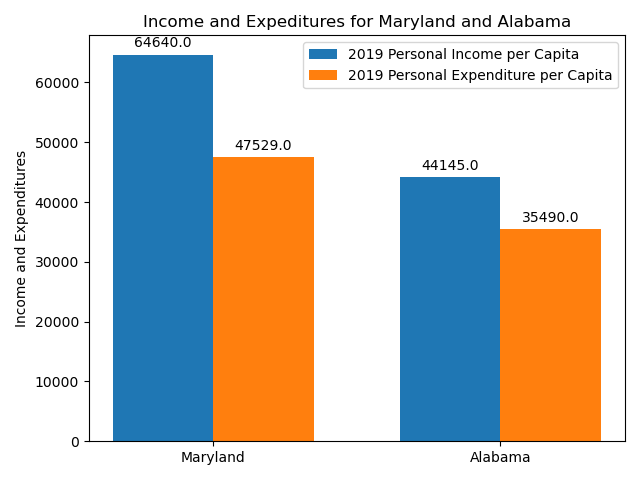

In [84]:
labels = [state_1, state_2]
legend = [f'{year} Personal Income per Capita', f'{year} Personal Expenditure per Capita']
income_per_capita = [state1_income, state2_income]
expenditures_per_capita = [state1_expend, state2_expend]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, income_per_capita, width, label=state_1)
rects2 = ax.bar(x + width/2, expenditures_per_capita, width, label=state_2)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Income and Expenditures')
ax.set_title(f'Income and Expeditures for {state_1} and {state_2}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(legend)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

(64640.0, 64640.0)

In [19]:
#Saving to csv for analysis
combined_income_expenditure_df.to_csv ("..\Analysis_results\Cleaned_income_Expenditure.csv", index = True, header=True)